In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch
from torch.distributions import Normal
from torch.nn.functional import softplus

from combinators.model import model
from combinators.inference import importance, mcmc
from combinators import utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
data = {
    'X': torch.normal(torch.ones(2) * 3, torch.ones(2))
}

In [5]:
class GenerativeGaussian(model.Primitive):
    def _forward(self, data={}):
        z = self.sample(Normal, torch.zeros(*self.batch_shape, 2), torch.ones(*self.batch_shape, 2), name='Z')
        return self.observe('X', data.get('X', None), Normal, loc=torch.zeros(*self.batch_shape, 2) + z, scale=torch.ones(*self.batch_shape, 2))

In [6]:
class VariationalGaussian(model.Primitive):
    def __init__(self, params={}, trainable=True, batch_shape=(1,), q=None):
        params = {
            'Z': {
                'loc': torch.zeros(2),
                'scale': torch.ones(2) * 5,
            }
        } if not params else params
        super(VariationalGaussian, self).__init__(params, trainable, batch_shape, q)
    
    @property
    def name(self):
        return 'GenerativeGaussian'
    
    def _forward(self, data={}):
        zs = self.args_vardict()['Z']
        self.sample(Normal, loc=zs['loc'], scale=softplus(zs['scale']), name='Z')

In [7]:
sampler = importance.Propose(target=GenerativeGaussian(batch_shape=(10,)),
                             proposal=VariationalGaussian(batch_shape=(10,)))

In [8]:
tau, params, evidence_bounds = importance.variational_importance(
    sampler, 1000, data, use_cuda=True, lr=1e-1,
    inclusive_kl=True, patience=100,
    log_estimator=False,
)       

03/05/2019 10:40:10 EUBO=2.53439713e+00 at epoch 1
03/05/2019 10:40:10 EUBO=2.55979478e-01 at epoch 2
03/05/2019 10:40:10 EUBO=1.22092879e+00 at epoch 3
03/05/2019 10:40:10 EUBO=2.27467847e+00 at epoch 4
03/05/2019 10:40:10 EUBO=8.57089646e-04 at epoch 5
03/05/2019 10:40:10 EUBO=1.80326498e+00 at epoch 6
03/05/2019 10:40:10 EUBO=2.75621437e-09 at epoch 7
03/05/2019 10:40:10 EUBO=1.16449900e-13 at epoch 8
03/05/2019 10:40:10 EUBO=5.87006450e-01 at epoch 9
03/05/2019 10:40:10 EUBO=8.94380152e-01 at epoch 10
03/05/2019 10:40:10 EUBO=8.36042786e+00 at epoch 11
03/05/2019 10:40:10 EUBO=1.68157005e+00 at epoch 12
03/05/2019 10:40:10 EUBO=4.87402320e-01 at epoch 13
03/05/2019 10:40:10 EUBO=4.55211461e-01 at epoch 14
03/05/2019 10:40:10 EUBO=2.56453431e-03 at epoch 15
03/05/2019 10:40:10 EUBO=3.53865062e-07 at epoch 16
03/05/2019 10:40:10 EUBO=8.33536591e-03 at epoch 17
03/05/2019 10:40:10 EUBO=1.35100871e-01 at epoch 18
03/05/2019 10:40:10 EUBO=7.70030841e-02 at epoch 19
03/05/2019 10:40:10 E

Epoch   108: reducing learning rate of group 0 to 5.0000e-02.


03/05/2019 10:40:10 EUBO=6.40881872e+00 at epoch 209
03/05/2019 10:40:10 EUBO=6.46357489e+00 at epoch 210
03/05/2019 10:40:10 EUBO=6.42773247e+00 at epoch 211
03/05/2019 10:40:10 EUBO=6.39860678e+00 at epoch 212
03/05/2019 10:40:10 EUBO=6.36931419e+00 at epoch 213
03/05/2019 10:40:10 EUBO=6.33125591e+00 at epoch 214
03/05/2019 10:40:10 EUBO=6.36932278e+00 at epoch 215
03/05/2019 10:40:10 EUBO=6.40438938e+00 at epoch 216
03/05/2019 10:40:10 EUBO=6.38880968e+00 at epoch 217
03/05/2019 10:40:10 EUBO=6.37436676e+00 at epoch 218
03/05/2019 10:40:10 EUBO=6.42964745e+00 at epoch 219
03/05/2019 10:40:10 EUBO=6.57345915e+00 at epoch 220
03/05/2019 10:40:10 EUBO=6.39353275e+00 at epoch 221
03/05/2019 10:40:10 EUBO=6.60843277e+00 at epoch 222
03/05/2019 10:40:10 EUBO=6.42411232e+00 at epoch 223
03/05/2019 10:40:10 EUBO=6.48920822e+00 at epoch 224
03/05/2019 10:40:10 EUBO=6.40601587e+00 at epoch 225
03/05/2019 10:40:10 EUBO=6.39985275e+00 at epoch 226
03/05/2019 10:40:10 EUBO=6.35931492e+00 at epo

Epoch   209: reducing learning rate of group 0 to 2.5000e-02.
Epoch   310: reducing learning rate of group 0 to 1.2500e-02.


03/05/2019 10:40:10 EUBO=6.60396719e+00 at epoch 313
03/05/2019 10:40:10 EUBO=6.15597343e+00 at epoch 314
03/05/2019 10:40:10 EUBO=6.30045652e+00 at epoch 315
03/05/2019 10:40:10 EUBO=6.26081991e+00 at epoch 316
03/05/2019 10:40:10 EUBO=6.21506500e+00 at epoch 317
03/05/2019 10:40:10 EUBO=5.98587370e+00 at epoch 318
03/05/2019 10:40:10 EUBO=6.41066742e+00 at epoch 319
03/05/2019 10:40:10 EUBO=6.49775600e+00 at epoch 320
03/05/2019 10:40:10 EUBO=6.39175415e+00 at epoch 321
03/05/2019 10:40:11 EUBO=5.98746681e+00 at epoch 322
03/05/2019 10:40:11 EUBO=6.20151901e+00 at epoch 323
03/05/2019 10:40:11 EUBO=6.24422073e+00 at epoch 324
03/05/2019 10:40:11 EUBO=6.42986059e+00 at epoch 325
03/05/2019 10:40:11 EUBO=6.36915350e+00 at epoch 326
03/05/2019 10:40:11 EUBO=6.53395176e+00 at epoch 327
03/05/2019 10:40:11 EUBO=6.35848761e+00 at epoch 328
03/05/2019 10:40:11 EUBO=6.58281183e+00 at epoch 329
03/05/2019 10:40:11 EUBO=6.52747202e+00 at epoch 330
03/05/2019 10:40:11 EUBO=3.87944722e+00 at epo

Epoch   411: reducing learning rate of group 0 to 6.2500e-03.
Epoch   512: reducing learning rate of group 0 to 3.1250e-03.


03/05/2019 10:40:11 EUBO=6.52104998e+00 at epoch 519
03/05/2019 10:40:11 EUBO=6.51050949e+00 at epoch 520
03/05/2019 10:40:11 EUBO=6.51461554e+00 at epoch 521
03/05/2019 10:40:11 EUBO=6.49964905e+00 at epoch 522
03/05/2019 10:40:11 EUBO=6.47980118e+00 at epoch 523
03/05/2019 10:40:11 EUBO=6.50849724e+00 at epoch 524
03/05/2019 10:40:11 EUBO=6.45994711e+00 at epoch 525
03/05/2019 10:40:11 EUBO=6.50600052e+00 at epoch 526
03/05/2019 10:40:11 EUBO=6.51135874e+00 at epoch 527
03/05/2019 10:40:11 EUBO=6.53019428e+00 at epoch 528
03/05/2019 10:40:11 EUBO=6.46720839e+00 at epoch 529
03/05/2019 10:40:11 EUBO=6.47642422e+00 at epoch 530
03/05/2019 10:40:11 EUBO=6.51044273e+00 at epoch 531
03/05/2019 10:40:11 EUBO=6.46658039e+00 at epoch 532
03/05/2019 10:40:11 EUBO=6.53505325e+00 at epoch 533
03/05/2019 10:40:11 EUBO=6.48192501e+00 at epoch 534
03/05/2019 10:40:11 EUBO=6.51192808e+00 at epoch 535
03/05/2019 10:40:11 EUBO=6.51318979e+00 at epoch 536
03/05/2019 10:40:11 EUBO=6.51560831e+00 at epo

Epoch   613: reducing learning rate of group 0 to 1.5625e-03.


03/05/2019 10:40:11 EUBO=6.46780682e+00 at epoch 708
03/05/2019 10:40:11 EUBO=6.43008947e+00 at epoch 709
03/05/2019 10:40:11 EUBO=6.46976519e+00 at epoch 710
03/05/2019 10:40:11 EUBO=6.49897814e+00 at epoch 711
03/05/2019 10:40:11 EUBO=6.48104382e+00 at epoch 712
03/05/2019 10:40:11 EUBO=6.53415632e+00 at epoch 713
03/05/2019 10:40:11 EUBO=6.44654655e+00 at epoch 714
03/05/2019 10:40:11 EUBO=6.44688129e+00 at epoch 715
03/05/2019 10:40:11 EUBO=6.45532751e+00 at epoch 716
03/05/2019 10:40:11 EUBO=6.52173138e+00 at epoch 717
03/05/2019 10:40:11 EUBO=6.52727509e+00 at epoch 718
03/05/2019 10:40:11 EUBO=6.44404173e+00 at epoch 719
03/05/2019 10:40:11 EUBO=6.52321625e+00 at epoch 720
03/05/2019 10:40:11 EUBO=6.47877455e+00 at epoch 721
03/05/2019 10:40:11 EUBO=6.50671387e+00 at epoch 722
03/05/2019 10:40:11 EUBO=6.49808168e+00 at epoch 723
03/05/2019 10:40:11 EUBO=6.40105629e+00 at epoch 724
03/05/2019 10:40:11 EUBO=6.54127026e+00 at epoch 725
03/05/2019 10:40:11 EUBO=6.37248039e+00 at epo

Epoch   714: reducing learning rate of group 0 to 7.8125e-04.


03/05/2019 10:40:11 EUBO=6.52418566e+00 at epoch 817
03/05/2019 10:40:12 EUBO=6.53021479e+00 at epoch 818
03/05/2019 10:40:12 EUBO=6.55703306e+00 at epoch 819
03/05/2019 10:40:12 EUBO=6.44956493e+00 at epoch 820
03/05/2019 10:40:12 EUBO=6.42767429e+00 at epoch 821
03/05/2019 10:40:12 EUBO=6.36850309e+00 at epoch 822
03/05/2019 10:40:12 EUBO=6.31941271e+00 at epoch 823
03/05/2019 10:40:12 EUBO=6.38425589e+00 at epoch 824
03/05/2019 10:40:12 EUBO=6.52243757e+00 at epoch 825
03/05/2019 10:40:12 EUBO=6.40693045e+00 at epoch 826
03/05/2019 10:40:12 EUBO=6.48503733e+00 at epoch 827
03/05/2019 10:40:12 EUBO=6.48881149e+00 at epoch 828
03/05/2019 10:40:12 EUBO=6.51991320e+00 at epoch 829
03/05/2019 10:40:12 EUBO=6.43049383e+00 at epoch 830
03/05/2019 10:40:12 EUBO=6.50655985e+00 at epoch 831
03/05/2019 10:40:12 EUBO=6.44325018e+00 at epoch 832
03/05/2019 10:40:12 EUBO=6.49590063e+00 at epoch 833
03/05/2019 10:40:12 EUBO=6.43129158e+00 at epoch 834
03/05/2019 10:40:12 EUBO=6.36103964e+00 at epo

Epoch   815: reducing learning rate of group 0 to 3.9063e-04.


03/05/2019 10:40:12 EUBO=6.47779083e+00 at epoch 914
03/05/2019 10:40:12 EUBO=6.51681757e+00 at epoch 915
03/05/2019 10:40:12 EUBO=6.50437164e+00 at epoch 916
03/05/2019 10:40:12 EUBO=6.42786932e+00 at epoch 917
03/05/2019 10:40:12 EUBO=6.42629910e+00 at epoch 918
03/05/2019 10:40:12 EUBO=6.50766563e+00 at epoch 919
03/05/2019 10:40:12 EUBO=6.54140329e+00 at epoch 920
03/05/2019 10:40:12 EUBO=6.46378803e+00 at epoch 921
03/05/2019 10:40:12 EUBO=6.50500059e+00 at epoch 922
03/05/2019 10:40:12 EUBO=6.49496698e+00 at epoch 923
03/05/2019 10:40:12 EUBO=6.47543144e+00 at epoch 924
03/05/2019 10:40:12 EUBO=6.51339340e+00 at epoch 925
03/05/2019 10:40:12 EUBO=6.44423580e+00 at epoch 926
03/05/2019 10:40:12 EUBO=6.49109077e+00 at epoch 927
03/05/2019 10:40:12 EUBO=6.56849098e+00 at epoch 928
03/05/2019 10:40:12 EUBO=6.54196358e+00 at epoch 929
03/05/2019 10:40:12 EUBO=6.45174789e+00 at epoch 930
03/05/2019 10:40:12 EUBO=6.43100262e+00 at epoch 931
03/05/2019 10:40:12 EUBO=6.50269699e+00 at epo

Epoch   916: reducing learning rate of group 0 to 1.9531e-04.


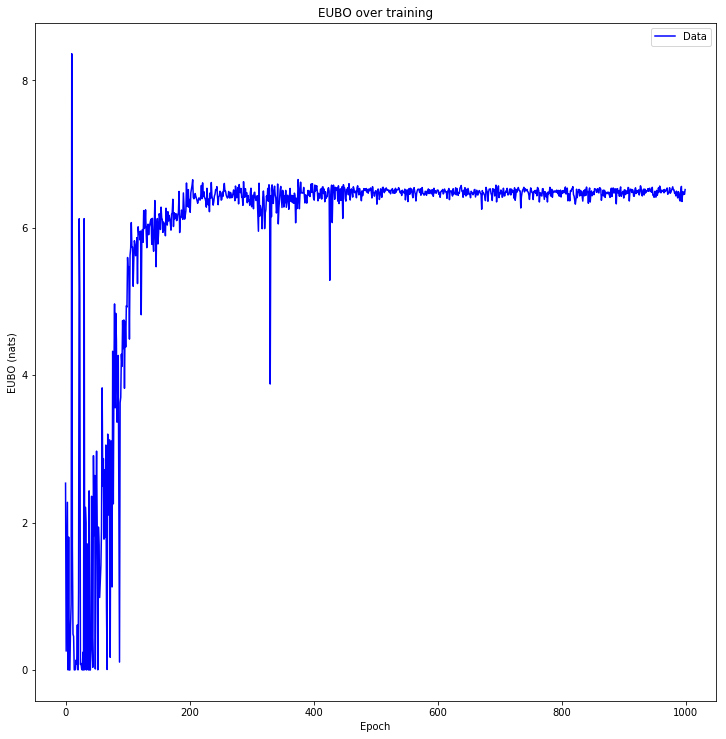

In [9]:
utils.plot_evidence_bounds(evidence_bounds, False)

In [10]:
sampler.proposal.Z__loc

Parameter containing:
tensor([1.3256, 1.6825], requires_grad=True)